In [1]:
import os
os.chdir("../")

In [2]:
import os 
import torch
from pathlib import Path
from dataclasses import dataclass
from src.vision_Transformer.utils.common import read_yaml, create_directories
from src.vision_Transformer.logging import logger
from src.vision_Transformer.constants import *
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [8]:
@dataclass(frozen = True)
class DataTransformationConfig:
    dataset_dir : Path

In [4]:
class ConfigurationManager:
    def __init__(self , 
                config_file_path = CONFIG_FILE_PATH, 
                params_file_path = PARAMS_FILE_PATH):
        
        self.config = read_yaml(config_file_path)
        self.params = read_yaml(params_file_path)

        create_directories([self.config.artifacts_root])

    def get_data_transformation_config(self) -> DataTransformationConfig:
        config = self.config.data_transformation

        data_transformation_config = DataTransformationConfig(
            dataset_dir= config.dataset_dir
        )

        return data_transformation_config

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
class DataTransformation:
    def __init__(self , config : DataTransformationConfig):
        self.config = config

    def data_augmentation(self):
        self.after_transforms = transforms.Compose([
            transforms.RandomCrop(32 , padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(brightness=0.2 ,contrast= 0.2, saturation=0.2 , hue=0.1),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5]*3 , std = [0.5]*3)
        ])
    
    def transformed_dataset(self):
        transformed_train_dataset = datasets.CIFAR10(
            root = self.config.dataset_dir,
            train = True,
            download= False,
            transform= self.after_transforms,
        )
        logger.info(f"Train Dataset Transformed Successfully")
        print(f"Train Dataset Transformed Successfully")

        transformed_test_dataset = datasets.CIFAR10(
            root = self.config.dataset_dir,
            train = False,
            download= False,
            transform= self.after_transforms,
        )
        logger.info(f"Test Dataset Transformed Successfully")
        print(f"Test Dataset Transformed Successfully")

        return transformed_train_dataset , transformed_test_dataset
    
    def plot_image(self, datasets, classes , num_images = 5):
        fig , axes = plt.subplots(1 , num_images , figsize = (10, 5))

        for i in range(num_images):
            img , label = datasets[i + np.random.randint(0, 10)]

            image = img.permute(1 , 2, 0).numpy()
            image = (image * 0.5) + 0.5 # de-normalized by 
            # original_pixel= ( normalized_pixel × std ) + mean 


            axes[i].imshow(image)
            axes[i].set_title(classes[label])
            axes[i].axis("off")
        plt.tight_layout()
        plt.show()

[2025-08-02 12:00:32,506 : INFO : common  : yaml file config\config.yaml was read succesfully]
[2025-08-02 12:00:32,508 : INFO : common  : yaml file params.yaml was read succesfully]
[2025-08-02 12:00:32,509 : INFO : common  : Created directory at : artifacts]
[2025-08-02 12:00:33,128 : INFO : 2010391418  : Train Dataset Transformed Successfully]
Train Dataset Transformed Successfully
[2025-08-02 12:00:33,575 : INFO : 2010391418  : Test Dataset Transformed Successfully]
Test Dataset Transformed Successfully


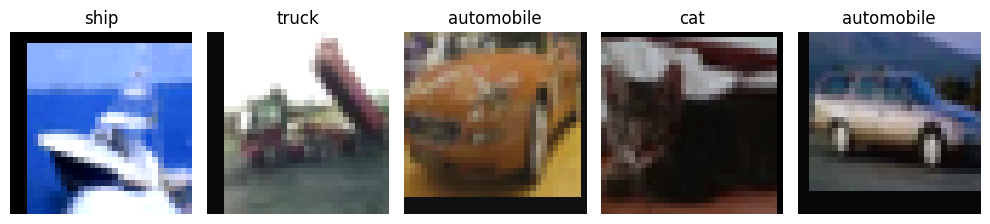

In [16]:
try:
    config = ConfigurationManager()
    data_transformation_config = config.get_data_transformation_config()

    data_transformation = DataTransformation(data_transformation_config)

    data_transformation.data_augmentation()

    train_dataset , test_dataset = data_transformation.transformed_dataset()
    
    data_transformation.plot_image(train_dataset, train_dataset.classes)
except Exception as e:
    raise e